In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Predict whether a male's semen is to be diagnosed as normal or altered(citing a possibiliy of asthenozoospermia or oligozoospermia)

In [3]:
df = pd.read_csv('fertility_Diagnosis.txt', error_bad_lines=False,header=None,sep=",")
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [4]:
df.head(8)

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N


In [ ]:
['Season', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit']

In [5]:
df=df.rename(columns={0: "Season", 1: "Age",2: "Childish diseases",3: "Accident or serious trauma",4: "Surgical intervention",5: "High fevers in the last year",6: "Frequency of alcohol consumption",7: "Smoking habit",8: "Number of hours spent sitting per day end",9: "Diagnosis"})

In [6]:
df.shape

(100, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Season                                     100 non-null    float64
 1   Age                                        100 non-null    float64
 2   Childish diseases                          100 non-null    int64  
 3   Accident or serious trauma                 100 non-null    int64  
 4   Surgical intervention                      100 non-null    int64  
 5   High fevers in the last year               100 non-null    int64  
 6   Frequency of alcohol consumption           100 non-null    float64
 7   Smoking habit                              100 non-null    int64  
 8   Number of hours spent sitting per day end  100 non-null    float64
 9   Diagnosis                                  100 non-null    object 
dtypes: float64(4), int64(5), ob

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
Age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
Childish diseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
Accident or serious trauma,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
Surgical intervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
High fevers in the last year,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
Frequency of alcohol consumption,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
Smoking habit,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
Number of hours spent sitting per day end,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


## Feature Engineering

### Checking for null values

In [9]:
df.isnull().sum()

Season                                       0
Age                                          0
Childish diseases                            0
Accident or serious trauma                   0
Surgical intervention                        0
High fevers in the last year                 0
Frequency of alcohol consumption             0
Smoking habit                                0
Number of hours spent sitting per day end    0
Diagnosis                                    0
dtype: int64

## Handling Categorical Data

One of the many ways to handle categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [10]:
# As output variable is ordinal we will do Label Encoding
df.replace({"N": 0, "O": 1}, inplace = True)

In [12]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day end', 'Diagnosis'],
      dtype='object')

In [13]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day end,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


### Checking whether the target class is balanced or not

In [16]:
df["Diagnosis"].value_counts()

0    88
1    12
Name: Diagnosis, dtype: int64

[Text(0, 0, 'Normal'), Text(0, 0, 'Altered')]

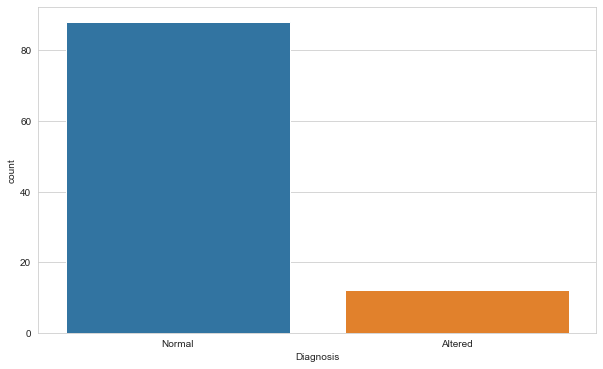

In [18]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Diagnosis",data=df)
plot.set_xticklabels(["Normal","Altered"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [14]:
columns = df.columns.tolist()
columns

['Season',
 'Age',
 'Childish diseases',
 'Accident or serious trauma',
 'Surgical intervention',
 'High fevers in the last year',
 'Frequency of alcohol consumption',
 'Smoking habit',
 'Number of hours spent sitting per day end',
 'Diagnosis']

In [15]:
X = df[['Season',
 'Age',
 'Childish diseases',
 'Accident or serious trauma',
 'Surgical intervention',
 'High fevers in the last year',
 'Frequency of alcohol consumption',
 'Smoking habit',
 'Number of hours spent sitting per day end',]]
Y = df['Diagnosis']

In [16]:
print(X.shape)
print(Y.shape)

(100, 9)
(100,)


In [17]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [18]:
os =RandomOverSampler(sampling_strategy=0.5)

In [19]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [20]:
X_train_res.shape,y_train_res.shape

((132, 9), (132,))

In [21]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 88, 1: 12})
Resampled dataset shape Counter({0: 88, 1: 44})


In [22]:
df=X_train_res
df['Diagnosis']=y_train_res

[Text(0, 0, 'Normal'), Text(0, 0, 'Altered')]

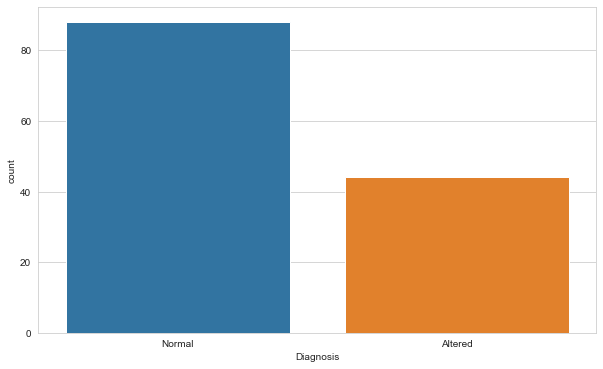

In [23]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Diagnosis",data=df)
plot.set_xticklabels(["Normal","Altered"])

In [24]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day end,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


## Performing EDA using Panda Profiling

In [31]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Semen Diagnosis')
prof_report.to_widgets()

## Feature Selection

#### Using Feature importance

In [25]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day end', 'Diagnosis'],
      dtype='object')

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['Season', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit']]  #independent columns
y = df['Diagnosis']    #target column

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.20216561 0.06854457 0.15547297 0.1256279  0.12750374 0.17630594
 0.14437926]


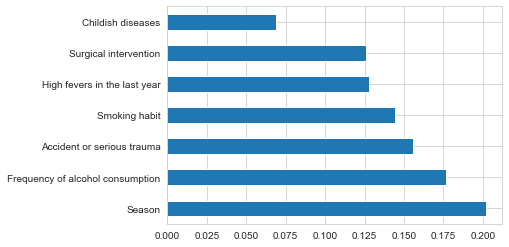

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

In [30]:
x=df[['Season', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit']]

In [31]:
y = df['Diagnosis']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [43]:

standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)


import pickle
#Saving the scaler to disk
pickle.dump(standardScaler, open('fertilityScaler.pkl', 'wb'))

In [134]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.85      0.92      0.88        12

    accuracy                           0.91        33
   macro avg       0.90      0.91      0.90        33
weighted avg       0.91      0.91      0.91        33



## FINAL MODEL SELECTED- SVM Model (rbf kernel)

In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [37]:
model=SVC(C=100,gamma=1,kernel="rbf")
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.86      1.00      0.92        12

    accuracy                           0.94        33
   macro avg       0.93      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [44]:
# Saving model to disk
pickle.dump(model, open('fertilityResultsA94R1-100R0-90.pkl','wb'))

In [57]:
x_test[20:23]

,Season,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit
101,1.00,1,0,1,0,0.8,-1
121,-0.33,1,1,0,0,0.8,-1
66,-0.33,1,1,0,-1,0.8,0


In [54]:
x_test[20:23]

array([[ 1.21399021,  0.43905704, -0.80622577,  0.85839508, -0.35555907,
        -0.05812382, -0.83539762],
       [-0.48849239,  0.43905704,  1.24034735, -1.16496475, -0.35555907,
        -0.05812382, -0.83539762],
       [-0.48849239,  0.43905704,  1.24034735, -1.16496475, -2.11557645,
        -0.05812382,  0.36321636]])

In [55]:
y_test[20:23]

101    1
121    1
66     0
Name: Diagnosis, dtype: int64